# PyTorch vs TensorFlow vs NumPy
> In this post I perform a simple set of benchmarks to assess the speed of PyTorch, Tensorflow and Numpy in different situations.

- toc:true
- badges: true
- comments: true
- author: Alejandro PS
- categories: [python, numpy, pytorch, tensorflow]

# Introduction
When it comes to Deep Learning I consider PyTorch as my default framework. It is easy to use, fast, elegant and debugging is pretty intuitive. The alternative the market offers is TensorFlow, which combined with Keras provides a powerful tool to create complex models.

On the other hand, in my day-to-day basis I use NumPy, a well-known library to create and manipulate arrays that supports other libraries (such as Pandas or Scikit-Learn).

Although NumPy does not fall in the Deep Learning frameworks category, I think it is natural to ask which one of these frameworks performs better as a tool to manipulate Tensors.

In this post, I try to cast some light by benchmarking the speed of these three libraries.

In [1]:
#collapse
import time
import torch
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
#hide
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The current versions I'm using for this experiment are

In [3]:
!pip freeze | grep "torch\|numpy\|tensorflow"

numpy==1.18.5
tensorflow==2.3.1
tensorflow-estimator==2.3.0
torch==1.7.0


The specs of my PC:

In [4]:
!sysctl -n machdep.cpu.brand_string

Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz


In [27]:
mem = !sysctl -n hw.memsize
f"{int(mem[0]) / (1024**3)} GB"

'16.0 GB'

Lastly, I am running TensorFlow in eager mode to make my life easier.

In [26]:
tf.executing_eagerly()

True

# The experiments
The procedure is simple. Test a set of operations for different sizes on the three libraries. Store the results and study them at the end.

The experiments are:
1. **Creation:** study time required to create tensor-like structures.
2. **Sorting:** analyze time to sort a tensor-like variable.
3. **Matrix multiplication:** check time to multiply to tensors.
4. **Searching/Traversing:** test time required to perform a linear search (traverse the structure).


## Creation
In this section, the speed for creating array-like structures will be tested for the three libraries.

In [6]:
# sizes to study
SIZES = [1000000, 50000000, 100000000, 200000000, 500000000]

In [7]:
#collapse
np_creation = np.zeros(len(SIZES))
torch_creation = np.zeros(len(SIZES))
tf_creation = np.zeros(len(SIZES))

In [8]:
#collapse
for i, size in enumerate(SIZES):
    start = time.time()
    tf.random.uniform(shape=(size,))

    end = time.time()
    tf_creation[i] = end - start

In [9]:
#collapse
for i, size in enumerate(SIZES):
    start = time.time()
    np.random.rand(size)

    end = time.time()
    np_creation[i] = end - start

In [10]:
#collapse
for i, size in enumerate(SIZES):
    start = time.time()
    torch.rand(size)

    end = time.time()
    torch_creation[i] = end - start

## Sorting
Sorting is one of the most difficult tasks for a processor. Moving elements from register to register takes a lot of time. This makes it a perfect candidate to test the speed of a particular framework.

In [11]:
#collapse
np_sort = np.zeros(len(SIZES))
torch_sort = np.zeros(len(SIZES))
tf_sort = np.zeros(len(SIZES))

In [12]:
#collapse-show
for i, size in enumerate(SIZES):
    _to_sort = tf.random.uniform(shape=(size,))
    
    start = time.time()
    
    tf.sort(_to_sort, axis=-1, direction="ASCENDING")
    
    end = time.time()
    
    tf_sort[i] = end - start

In [13]:
#collapse
for i, size in enumerate(SIZES):
    _to_sort = np.random.rand(size)
    
    start = time.time()
    np.sort(_to_sort)
    end = time.time()
    
    np_sort[i] = end - start

In [14]:
#collapse
for i, size in enumerate(SIZES):
    _to_sort = torch.rand(size)
    
    start = time.time()
    torch.sort(_to_sort, descending=False)
    end = time.time()
    
    torch_sort[i] = end - start

## Matrix multiplication
A naive procedure for multiplying two matrices can take up to $O(n^3)$ steps. Let's test how fast these frameworks have become in this aspect.

In [15]:
#collapse
np_matmul = np.zeros(len(SIZES))
torch_matmul = np.zeros(len(SIZES))
tf_matmul = np.zeros(len(SIZES))

It seems that, generally, TensorFlow objects are not assignable. That's why I used NumPy, then `tf.Variable` and lastly, `tf.convert_to_tensor` to get a tensor with the desired values.

In [16]:
#collapse-show
for i, size in enumerate(SIZES):
    _a = tf.random.uniform(shape=(1,size))
    _b = tf.reshape(_a, shape=(size,1))
    
    start = time.time()
    tf.linalg.matmul(_a, _b)
    end = time.time()
    
    tf_matmul[i] = end - start

In [17]:
#collapse
for i, size in enumerate(SIZES):
    _a = np.random.rand(size)
    _b = _a.reshape(-1,1)
    
    start = time.time()
    np.matmul(_a, _b)
    end = time.time()
    
    np_matmul[i] = end - start

In [18]:
#collapse
for i, size in enumerate(SIZES):
    _a = torch.rand(size)
    _b = _a.reshape(-1,1)
    
    start = time.time()
    torch.matmul(_a, _b)
    end = time.time()
    
    torch_matmul[i] = end - start

## Searching
We will perform a linear search with a simple loop. In fact, this test will also assess the traverse speed of the different frameworks.

I have coded the solution using a for loop because I've already know that the element to search is in the last position; hence, we can consider this loop as a counter loop where the number of iterations is known beforehand.

In [19]:
# the original sizes take too long
SIZES_ = [10000, 50000, 100000, 500000, 1000000]

In [20]:
#collapse
np_search = np.zeros(len(SIZES_))
torch_search = np.zeros(len(SIZES_))
tf_search = np.zeros(len(SIZES_))

It seems that, generally, TensorFlow objects are not assignable. That's why I used NumPy, then `tf.Variable` and lastly, `tf.convert_to_tensor` to get a tensor with the desired values.

In [21]:
#collapse-show
for i, size in enumerate(SIZES_):
    _np = np.zeros(size)
    _np[-1] = 27
    
    _to_search = tf.convert_to_tensor(tf.Variable(_np))
    
    start = time.time()
    
    for j, element in enumerate(_to_search):
        if element == 27:
            end = time.time()
    
    tf_search[i] = end - start

In [22]:
#collapse
for i, size in enumerate(SIZES_):
    _to_search = np.zeros(size)
    _to_search[-1] = 27
    
    start = time.time()
    
    for j, element in enumerate(_to_search):
        if element == 27:
            end = time.time()
    
    np_search[i] = end - start

In [23]:
#collapse
for i, size in enumerate(SIZES_):
    _to_search = torch.zeros(size)
    _to_search[-1] = 27
    
    start = time.time()
    
    for j, element in enumerate(_to_search):
        if element == 27:
            end = time.time()
    
    torch_search[i] = end - start

# Results

W1207 17:37:31.955271 4738452992 font_manager.py:1282] findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
W1207 17:37:31.970885 4738452992 font_manager.py:1282] findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
W1207 17:37:32.127390 4738452992 font_manager.py:1282] findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


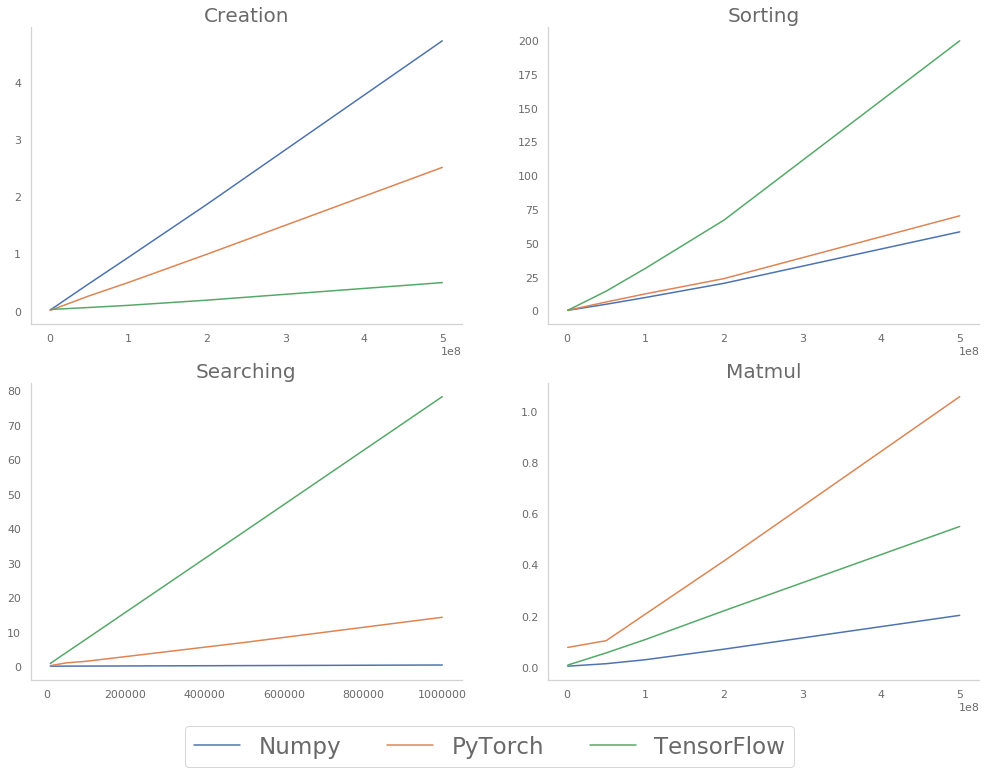

In [24]:
#collapse
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,12))

ax[0][0].plot(SIZES, np_creation, label="Numpy")
ax[0][0].plot(SIZES, torch_creation, label="PyTorch")
ax[0][0].plot(SIZES, tf_creation, label="TensorFlow")
ax[0][0].set_title("Creation")

ax[0][1].plot(SIZES, np_sort, label="Numpy")
ax[0][1].plot(SIZES, torch_sort, label="PyTorch")
ax[0][1].plot(SIZES, tf_sort, label="TensorFlow")
ax[0][1].set_title("Sorting")

ax[1][0].plot(SIZES_, np_search, label="Numpy")
ax[1][0].plot(SIZES_, torch_search, label="PyTorch")
ax[1][0].plot(SIZES_, tf_search, label="TensorFlow")
ax[1][0].set_title("Searching")

ax[1][1].plot(SIZES, np_matmul, label="Numpy")
ax[1][1].plot(SIZES, torch_matmul, label="PyTorch")
ax[1][1].plot(SIZES, tf_matmul, label="TensorFlow")
ax[1][1].set_title("Matmul")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center', ncol=3, bbox_to_anchor=[0.4, 0.04], fontsize=23)

I am surprised by how well NumPy performs in general. It is faster in everything except in the `creation` test. One possible explanation is that **NumPy is more optimized for the CPU**. Unfortunatelly, I do not have a GPU to test this and, even if I had one, NumPy does not support GPU execution natively.

Regarding PyTorch and Tensorflow, I do not see a clear winner. Searching and sorting takes an insane amount of time for Tensorflow compared with the others, but I am running it in eager mode to make the code human-readible.

# Which one should I use?
There is no clear answer to that question because it depends on what you want to achieve. If you work in a Data Science field with Python, you would probably need to use NumPy even if you don't want to (though I can't image why you wouldn't want to).

In terms of Deep Learning research, I think PyTorch is more well-suited than TensorFlow because it is easy to learn and to iterate over the models.

Regarding Production-level code, I would consider TensorFlow (with eager mode deactivated) the best one. It is one of the oldest and a lot of services support TensorFlow integration.